In [1]:
# Загрузка и первичный анализ данных
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline
sns.set(style="ticks")

In [2]:
# Будем использовать только обучающую выборку
hdata_loaded = pd.read_csv('/content/Untitled Folder/Stats survey.csv', sep=",")

In [3]:
hdata_loaded.shape

(406, 17)

In [4]:
hdata = hdata_loaded

# Удаление пропущенных значений


In [5]:
list(zip(hdata.columns, [i for i in hdata.dtypes]))

[('Timestamp', dtype('O')),
 ('Your Sex?', dtype('O')),
 ('Your Matric (grade 12) Average/ GPA (in %)', dtype('float64')),
 ('What year were you in last year (2023) ?', dtype('O')),
 ('What faculty does your degree fall under?', dtype('O')),
 ('Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
  dtype('float64')),
 ('Your Accommodation Status Last Year (2023)', dtype('O')),
 ('Monthly Allowance in 2023', dtype('O')),
 ('Were you on scholarship/bursary in 2023?', dtype('O')),
 ('Additional amount of studying (in hrs) per week', dtype('O')),
 ('How often do you go out partying/socialising during the week? ',
  dtype('O')),
 ('On a night out, how many alcoholic drinks do you consume?', dtype('O')),
 ('How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
  dtype('O')),
 ('How many modules have you failed thus far into your studies?', dtype('O')),
 ('Are you currently in a romantic relationship?', dtype('O')),

In [6]:
# Колонки с пропусками
hcols_with_na = [c for c in hdata.columns if hdata[c].isnull().sum() > 0]
hcols_with_na

['Your Sex?',
 'Your Matric (grade 12) Average/ GPA (in %)',
 'What year were you in last year (2023) ?',
 'What faculty does your degree fall under?',
 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
 'Your Accommodation Status Last Year (2023)',
 'Monthly Allowance in 2023',
 'Were you on scholarship/bursary in 2023?',
 'Additional amount of studying (in hrs) per week',
 'How often do you go out partying/socialising during the week? ',
 'On a night out, how many alcoholic drinks do you consume?',
 'How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
 'How many modules have you failed thus far into your studies?',
 'Are you currently in a romantic relationship?',
 'Do your parents approve alcohol consumption?',
 'How strong is your relationship with your parent/s?']

In [7]:
hdata.shape

(406, 17)

In [8]:
# Количество пропусков
[(c, hdata[c].isnull().sum()) for c in hcols_with_na]

[('Your Sex?', 2),
 ('Your Matric (grade 12) Average/ GPA (in %)', 7),
 ('What year were you in last year (2023) ?', 73),
 ('What faculty does your degree fall under?', 7),
 ('Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
  86),
 ('Your Accommodation Status Last Year (2023)', 23),
 ('Monthly Allowance in 2023', 31),
 ('Were you on scholarship/bursary in 2023?', 8),
 ('Additional amount of studying (in hrs) per week', 3),
 ('How often do you go out partying/socialising during the week? ', 2),
 ('On a night out, how many alcoholic drinks do you consume?', 2),
 ('How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
  3),
 ('How many modules have you failed thus far into your studies?', 3),
 ('Are you currently in a romantic relationship?', 3),
 ('Do your parents approve alcohol consumption?', 4),
 ('How strong is your relationship with your parent/s?', 3)]

In [9]:
# Доля (процент) пропусков
[(c, hdata[c].isnull().mean()) for c in hcols_with_na]

[('Your Sex?', 0.0049261083743842365),
 ('Your Matric (grade 12) Average/ GPA (in %)', 0.017241379310344827),
 ('What year were you in last year (2023) ?', 0.17980295566502463),
 ('What faculty does your degree fall under?', 0.017241379310344827),
 ('Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
  0.21182266009852216),
 ('Your Accommodation Status Last Year (2023)', 0.05665024630541872),
 ('Monthly Allowance in 2023', 0.07635467980295567),
 ('Were you on scholarship/bursary in 2023?', 0.019704433497536946),
 ('Additional amount of studying (in hrs) per week', 0.007389162561576354),
 ('How often do you go out partying/socialising during the week? ',
  0.0049261083743842365),
 ('On a night out, how many alcoholic drinks do you consume?',
  0.0049261083743842365),
 ('How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
  0.007389162561576354),
 ('How many modules have you failed thus far into your studie

In [10]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['What year were you in last year (2023) ?', 'Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)']

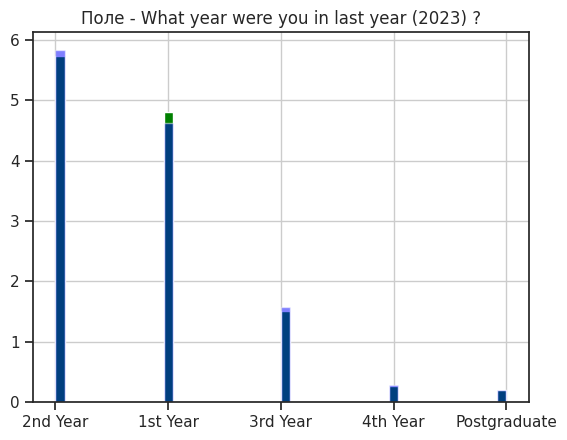

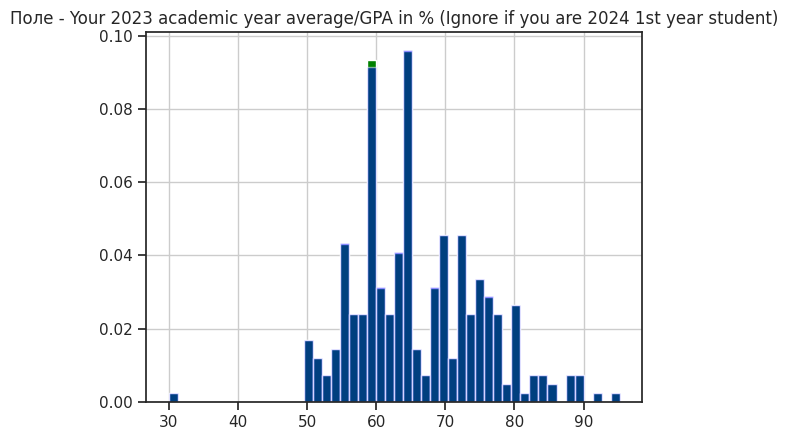

In [13]:
plot_hist_diff(hdata, hdata_drop, hcols_with_na_temp)

# Кодирование категориальных признаков



In [16]:
data_features = list(zip(
# признаки
[i for i in hdata_loaded.columns],
zip(
    # типы колонок
    [str(i) for i in hdata_loaded.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in hdata_loaded.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('Timestamp', ('object', 0)),
 ('Your Sex?', ('object', 2)),
 ('Your Matric (grade 12) Average/ GPA (in %)', ('float64', 7)),
 ('What year were you in last year (2023) ?', ('object', 73)),
 ('What faculty does your degree fall under?', ('object', 7)),
 ('Your 2023 academic year average/GPA in % (Ignore if you are 2024 1st year student)',
  ('float64', 86)),
 ('Your Accommodation Status Last Year (2023)', ('object', 23)),
 ('Monthly Allowance in 2023', ('object', 31)),
 ('Were you on scholarship/bursary in 2023?', ('object', 8)),
 ('Additional amount of studying (in hrs) per week', ('object', 3)),
 ('How often do you go out partying/socialising during the week? ',
  ('object', 2)),
 ('On a night out, how many alcoholic drinks do you consume?', ('object', 2)),
 ('How many classes do you miss per week due to alcohol reasons, (i.e: being hungover or too tired?)',
  ('object', 3)),
 ('How many modules have you failed thus far into your studies?',
  ('object', 3)),
 ('Are you currently in a

In [29]:
# Используем только некоторые признаки
cols_filter = ['Your Sex?', 'Monthly Allowance in 2023', 'Do your parents approve alcohol consumption?'

        ]
data = hdata_loaded[cols_filter]
data.head()

,Your Sex?,Monthly Allowance in 2023,Do your parents approve alcohol consumption?
0,Female,R 4001- R 5000,Yes
1,Male,R 7001 - R 8000,Yes
2,Male,R 4001- R 5000,Yes
3,Male,R 6001 - R 7000,Yes
4,Female,R 4001- R 5000,Yes


In [30]:
# Заполним пропуски
data.dropna(subset=['Your Sex?', 'Monthly Allowance in 2023'], inplace=True)

<ipython-input-30-59e195734685>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['Your Sex?', 'Monthly Allowance in 2023'], inplace=True)


In [31]:
# От каюты оставляет только первую букву
# и убираем каюты типа Т так как их мало
data['Do your parents approve alcohol consumption?'] = data['Do your parents approve alcohol consumption?'].astype(str).str[0]
data = data[data['Do your parents approve alcohol consumption?'] != 'T']


<ipython-input-31-f3ac57143140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Do your parents approve alcohol consumption?'] = data['Do your parents approve alcohol consumption?'].astype(str).str[0]


In [32]:
# Убедимся что нет пустых значений
data.isnull().sum()

Your Sex?                                       0
Monthly Allowance in 2023                       0
Do your parents approve alcohol consumption?    0
dtype: int64

# Кодирование категорий целочисленными значениями - label encoding



In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['Do your parents approve alcohol consumption?'])

In [36]:
data['Do your parents approve alcohol consumption?'].unique()

array(['Y', 'N', 'n'], dtype=object)

In [38]:
np.unique(cat_enc_le)

array([0, 1, 2])

In [40]:
le.inverse_transform([0, 1, 2])

array(['N', 'Y', 'n'], dtype=object)

# Нормализация числовых признако


In [41]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [43]:
# Будем использовать только обучающую выборку
data = pd.read_csv('/content/Untitled Folder/Stats survey.csv', sep=",")

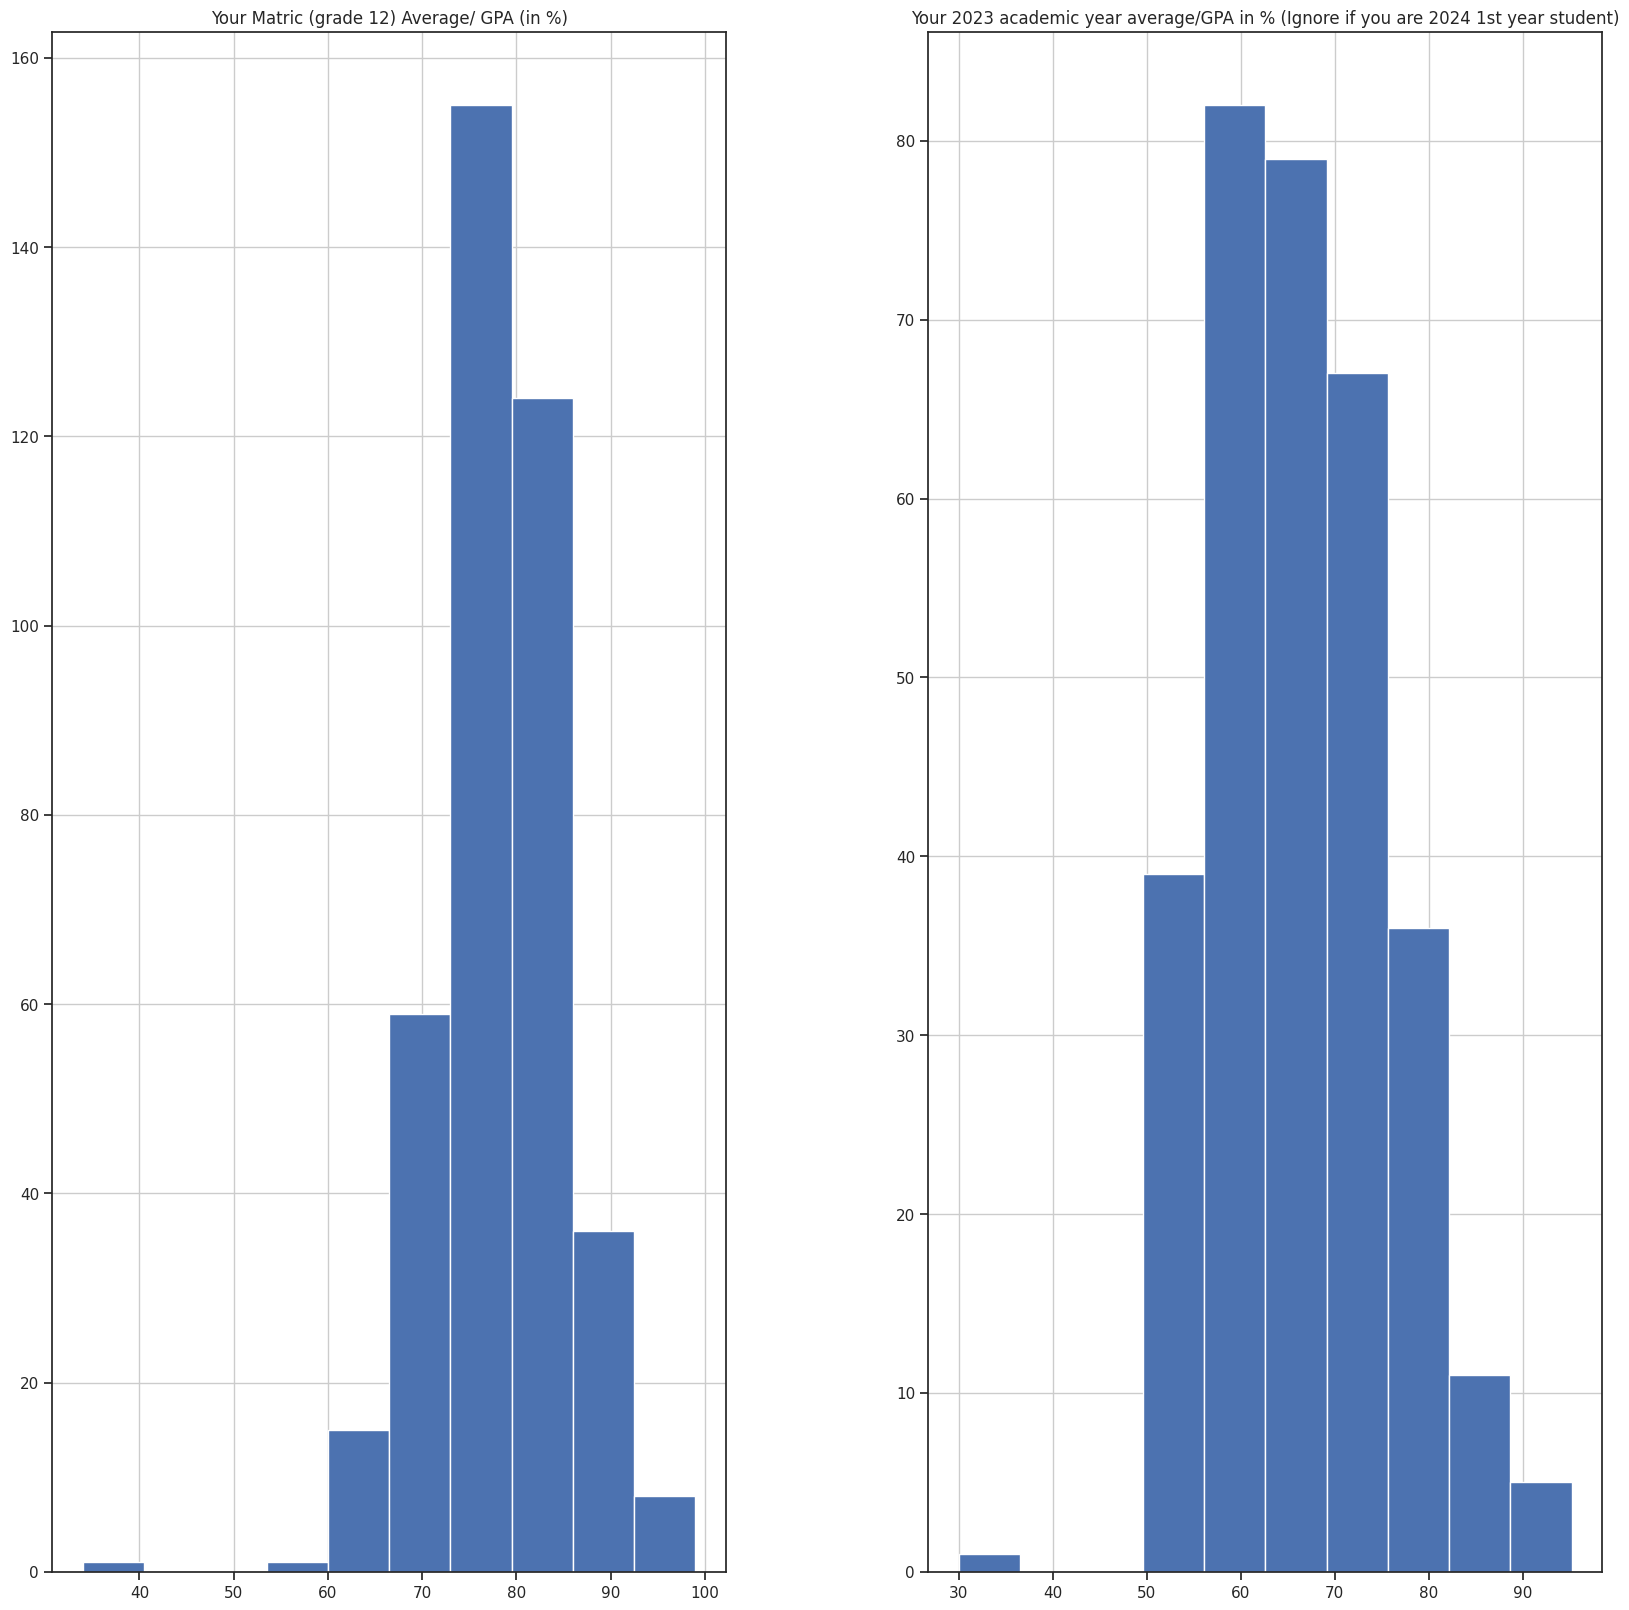

In [44]:
data.hist(figsize=(20,20))
plt.show()

In [48]:
from scipy import stats


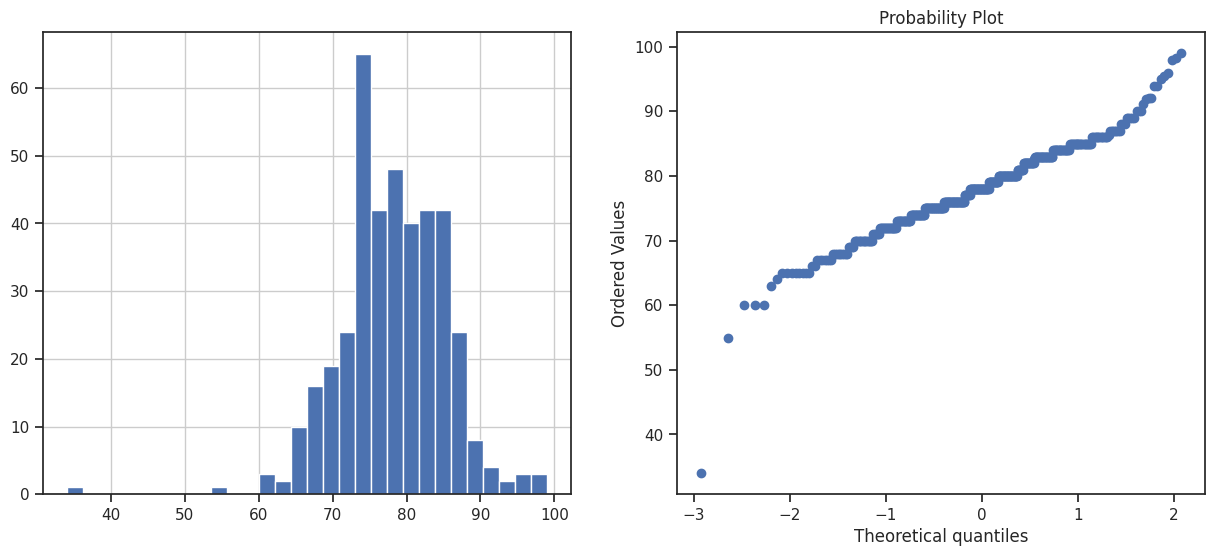

In [50]:
# Исходное распределение

diagnostic_plots(data, 'Your Matric (grade 12) Average/ GPA (in %)')


Логарифмическое преобразование


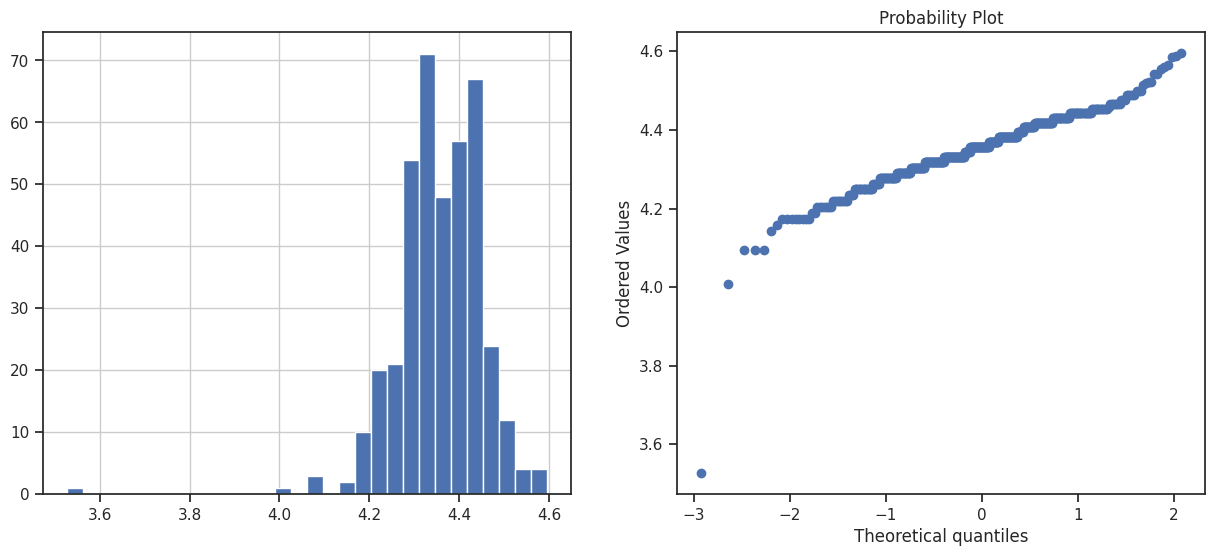

In [54]:
data['Your Matric (grade 12) Average/ GPA (in %)_log'] = np.log(data['Your Matric (grade 12) Average/ GPA (in %)'])
diagnostic_plots(data, 'Your Matric (grade 12) Average/ GPA (in %)_log')